In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [2]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}


In [5]:
# a) Ręczne obliczenia
import pandas as pd
df = pd.DataFrame(data_spam)

n_total = len(df)
n_spam = len(df[df['Spam'] == 'TAK'])
n_not_spam = len(df[df['Spam'] == 'NIE'])

p_spam = n_spam / n_total
p_not_spam = n_not_spam / n_total

print(f"P(Spam=TAK) = {p_spam:.3f}")
print(f"P(Spam=NIE) = {p_not_spam:.3f}")

P(Spam=TAK) = 0.333
P(Spam=NIE) = 0.667


In [16]:
# b) Prawdopodobieństwa warunkowe
import pandas as pd

data_spam = {
    'Słowo_1': ['darmowy','darmowy','spotkanie','raport','oferta','darmowy',
                'spotkanie','oferta','raport','darmowy','spotkanie','oferta'],
    'Słowo_2': ['wygrana','wygrana','jutro','kwartalny','specjalna','rabat',
                'dziś','limitowana','miesięczny','rabat','pilne','wyjątkowa'],
    'Wykrzyknik': ['TAK','TAK','NIE','NIE','TAK','TAK',
                   'NIE','TAK','NIE','TAK','NIE','TAK'],
    'Spam': ['TAK','TAK','NIE','NIE','NIE','TAK',
             'NIE','NIE','NIE','TAK','NIE','NIE']
}

df = pd.DataFrame(data_spam)

nowy = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

scores = {}

print("\n Obliczenia dla nowego emaila")

klasy = df['Spam'].unique()

for klasa in klasy:
    df_class = df[df['Spam'] == klasa]
    prior = len(df_class) / len(df)
    score = prior
    print(f"\nKlasa: {klasa}")

    for cecha, wartosc in nowy.items():
        p = (df_class[cecha] == wartosc).mean()
        score *= p
        print(f"  P({cecha}={wartosc} | {klasa}) = {p:.3f}")

    scores[klasa] = score
    print(f"Score dla {klasa}: {score:.6f}")

total_score = sum(scores.values())
normalized_scores = {k: v/total_score for k, v in scores.items()}

print("\n Wyniki po normalizacji")

for klasa, prob in normalized_scores.items():
    print(f"P(Spam={klasa} | cechy) = {prob:.3f}")



 Obliczenia dla nowego emaila

Klasa: TAK
  P(Słowo_1=darmowy | TAK) = 1.000
  P(Słowo_2=wygrana | TAK) = 0.500
  P(Wykrzyknik=TAK | TAK) = 1.000
Score dla TAK: 0.166667

Klasa: NIE
  P(Słowo_1=darmowy | NIE) = 0.000
  P(Słowo_2=wygrana | NIE) = 0.000
  P(Wykrzyknik=TAK | NIE) = 0.375
Score dla NIE: 0.000000

 Wyniki po normalizacji
P(Spam=TAK | cechy) = 1.000
P(Spam=NIE | cechy) = 0.000


In [13]:
# c) Predykcja
predykcja = max(scores, key=scores.get)
print(f"Klasyfikacja nowego emaila: Spam = {predykcja}")

Klasyfikacja nowego emaila: Spam = TAK


In [19]:
# SkLearn
X = df[['Słowo_1', 'Słowo_2', 'Wykrzyknik']]
y = df['Spam']

encoder = OrdinalEncoder()
X_enc = encoder.fit_transform(X)

model = CategoricalNB()
model.fit(X_enc, y)

nowy_df = pd.DataFrame([nowy])
nowy_enc = encoder.transform(nowy_df)

print("Predykcja:", model.predict(nowy_enc))
print("Prawdopodobieństwa TAK | NIE:", model.predict_proba(nowy_enc))

Predykcja: ['TAK']
Prawdopodobieństwa TAK | NIE: [[0.0321193 0.9678807]]


# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

In [22]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)



In [46]:
liczba_grypa = df_grypa['Grypa'].value_counts()
print("Liczba przypadków Grypy:")
print(liczba_grypa)
print(df_grypa.columns)

Liczba przypadków Grypy:
Grypa
TAK    8
NIE    7
Name: count, dtype: int64
Index(['Gorączka', 'Kaszel', 'Zmęczenie', 'Grypa'], dtype='object')


In [52]:
cechy = ['Gorączka', 'Kaszel', 'Zmęczenie']

for cecha in cechy:
    print(f"\nAnaliza cechy: {cecha}")
    for wartosc in df_grypa[cecha].unique():
        p_tak = len(df_grypa[(df_grypa['Grypa']=='TAK') & (df_grypa[cecha]==wartosc)]) / len(df_grypa[df_grypa['Grypa']=='TAK'])
        p_nie = len(df_grypa[(df_grypa['Grypa']=='NIE') & (df_grypa[cecha]==wartosc)]) / len(df_grypa[df_grypa['Grypa']=='NIE'])
        print(f"  {wartosc}: P({cecha}|Grypa=TAK)={p_tak:.2f}, P({cecha}|Grypa=NIE)={p_nie:.2f}, różnica={abs(p_tak-p_nie):.2f}")



Analiza cechy: Gorączka
  wysoka: P(Gorączka|Grypa=TAK)=0.75, P(Gorączka|Grypa=NIE)=0.14, różnica=0.61
  niska: P(Gorączka|Grypa=TAK)=0.00, P(Gorączka|Grypa=NIE)=0.71, różnica=0.71
  umiarkowana: P(Gorączka|Grypa=TAK)=0.25, P(Gorączka|Grypa=NIE)=0.14, różnica=0.11

Analiza cechy: Kaszel
  TAK: P(Kaszel|Grypa=TAK)=1.00, P(Kaszel|Grypa=NIE)=0.14, różnica=0.86
  NIE: P(Kaszel|Grypa=TAK)=0.00, P(Kaszel|Grypa=NIE)=0.86, różnica=0.86

Analiza cechy: Zmęczenie
  duże: P(Zmęczenie|Grypa=TAK)=0.88, P(Zmęczenie|Grypa=NIE)=0.00, różnica=0.88
  małe: P(Zmęczenie|Grypa=TAK)=0.00, P(Zmęczenie|Grypa=NIE)=0.86, różnica=0.86
  umiarkowane: P(Zmęczenie|Grypa=TAK)=0.12, P(Zmęczenie|Grypa=NIE)=0.14, różnica=0.02


Cecha z największą różnicą najlepiej wskazuje na grypę. Zatem : wysoka gorączka, kaszel oraz duże zmęczenie

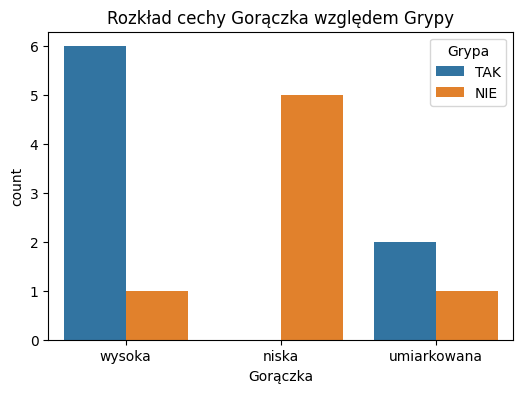

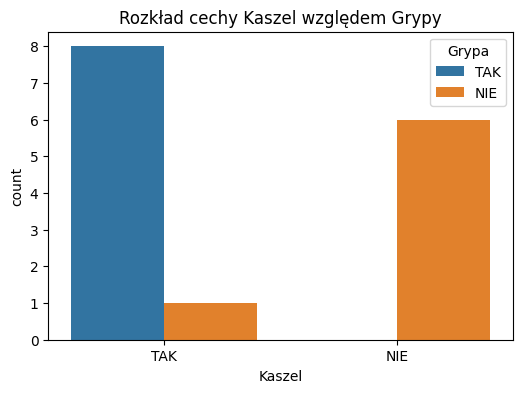

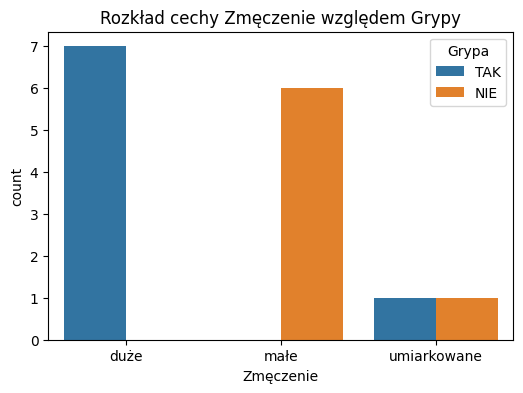

In [54]:
for cecha in cechy:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_grypa, x=cecha, hue='Grypa')
    plt.title(f'Rozkład cechy {cecha} względem Grypy')
    plt.show()


In [56]:
# ZAD2
pacjenci = [
    {'Gorączka':'wysoka', 'Kaszel':'TAK', 'Zmęczenie':'duże', 'nazwa':'Pacjent A'},
    {'Gorączka':'niska', 'Kaszel':'NIE', 'Zmęczenie':'małe', 'nazwa':'Pacjent B'},
    {'Gorączka':'umiarkowana', 'Kaszel':'TAK', 'Zmęczenie':'umiarkowane', 'nazwa':'Pacjent C'}
]

# Prawdopodobieństwa
p_grypa = len(df_grypa[df_grypa['Grypa']=='TAK']) / len(df_grypa)
p_nie_grypa = len(df_grypa[df_grypa['Grypa']=='NIE']) / len(df_grypa)

for pacjent in pacjenci:
    score_tak = p_grypa
    score_nie = p_nie_grypa
    for cecha in cechy:
        val = pacjent[cecha]
        p_feature_tak = len(df_grypa[(df_grypa['Grypa']=='TAK') & (df_grypa[cecha]==val)]) / len(df_grypa[df_grypa['Grypa']=='TAK'])
        p_feature_nie = len(df_grypa[(df_grypa['Grypa']=='NIE') & (df_grypa[cecha]==val)]) / len(df_grypa[df_grypa['Grypa']=='NIE'])
        score_tak *= p_feature_tak
        score_nie *= p_feature_nie

    # Normalizacja
    total = score_tak + score_nie
    p_tak_norm = score_tak / total
    p_nie_norm = score_nie / total

    print(f"\n{pacjent['nazwa']}: P(Grypa=TAK)={p_tak_norm:.3f}, P(Grypa=NIE)={p_nie_norm:.3f}")


Pacjent A: P(Grypa=TAK)=1.000, P(Grypa=NIE)=0.000

Pacjent B: P(Grypa=TAK)=0.000, P(Grypa=NIE)=1.000

Pacjent C: P(Grypa=TAK)=0.925, P(Grypa=NIE)=0.075
